In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashwath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashwath\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("indian_expense_classification_dataset.csv")


In [7]:
df["Category"].value_counts()

Category
Subscriptions     1091
Transportation    1040
Entertainment     1018
Rent              1010
Shopping           982
Utilities          980
Dining             976
Healthcare         974
Travel             967
Groceries          962
Name: count, dtype: int64

In [5]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return " ".join(words)

In [8]:
df["Prompt"] = df["Prompt"].apply(clean_text)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df["Prompt"], df["Category"], test_size=0.2, random_state=42)


In [11]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),  # Use bigrams for better feature representation
    ('model', MultinomialNB())
])  

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('model', MultinomialNB())])

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

        Dining       1.00      1.00      1.00       190
 Entertainment       1.00      1.00      1.00       216
     Groceries       1.00      1.00      1.00       203
    Healthcare       1.00      1.00      1.00       195
          Rent       1.00      1.00      1.00       181
      Shopping       1.00      1.00      1.00       193
 Subscriptions       1.00      1.00      1.00       240
Transportation       1.00      1.00      1.00       192
        Travel       1.00      1.00      1.00       205
     Utilities       1.00      1.00      1.00       185

      accuracy                           1.00      2000
     macro avg       1.00      1.00      1.00      2000
  weighted avg       1.00      1.00      1.00      2000



In [15]:
def classify_expense(user_input):
    processed_input = clean_text(user_input)
    predicted_category = pipeline.predict([processed_input])[0]
    if predicted_category not in df["Category"].unique():
        return "Others"
    return predicted_category

In [26]:
user_text = input("Enter your expense description: ")


In [27]:
print("Predicted Category:", classify_expense(user_text))

Predicted Category: Entertainment


In [29]:
joblib.dump(pipeline, "expense_classifier_model.pkl")

['expense_classifier_model.pkl']

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = {
    "Date": pd.date_range(start="2024-01-01", periods=50, freq='D'),
    "Store": ["Walmart", "Amazon", "McDonald's", "Starbucks", "Zomato", 
              "Big Bazaar", "Uber", "Nike", "Apple Store", "Subway"] * 5,
    "Category": ["Groceries", "Shopping", "Food", "Food", "Food", 
                 "Groceries", "Transport", "Shopping", "Electronics", "Food"] * 5,
    "Amount": [50, 200, 15, 5, 20, 80, 30, 150, 1000, 10] * 5
}
df = pd.DataFrame(data)

In [17]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")

C:\Users\Ashwath\AppData\Local\Temp\ipykernel_15948\4250544544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Category"], y=df["Amount"], estimator=sum, palette="viridis")


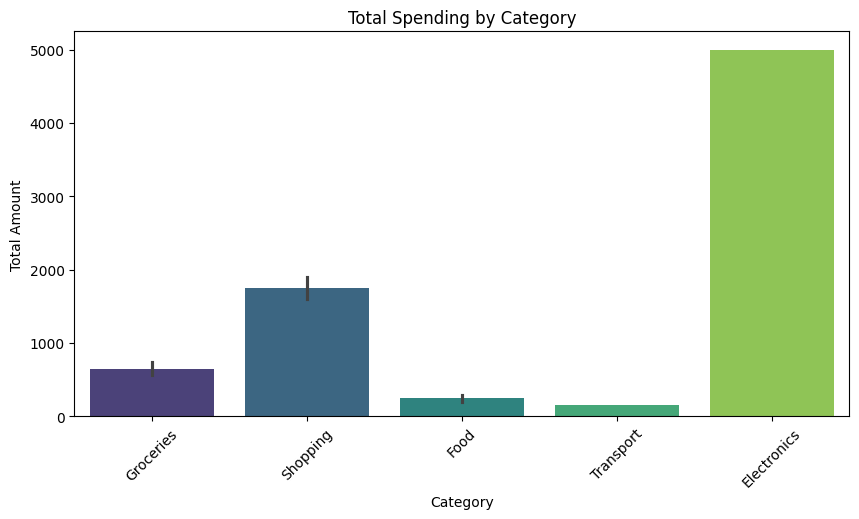

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Category"], y=df["Amount"], estimator=sum, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.show()

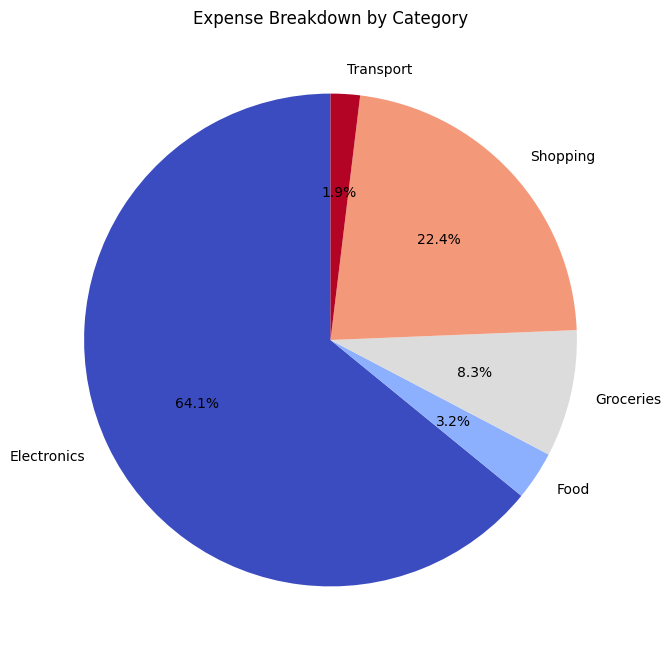

In [19]:
plt.figure(figsize=(8, 8))
df.groupby("Category")["Amount"].sum().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Expense Breakdown by Category")
plt.ylabel("")
plt.show()

<Figure size 1200x600 with 0 Axes>

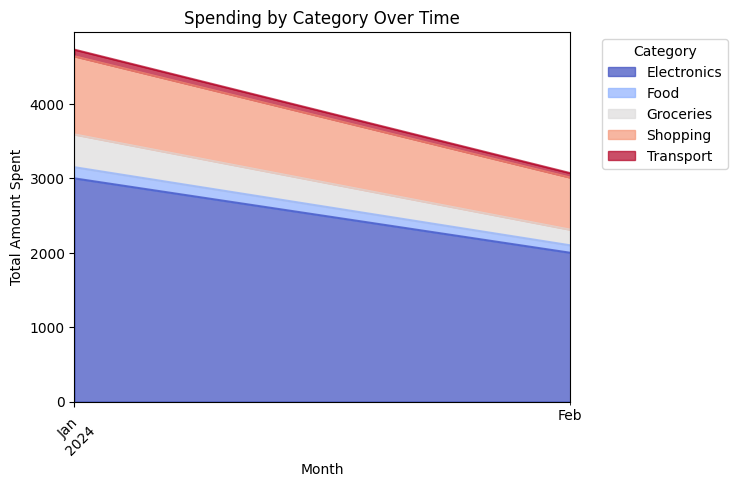

In [20]:
df_grouped = df.groupby(["Month", "Category"])["Amount"].sum().unstack()
plt.figure(figsize=(12, 6))
df_grouped.plot(kind="area", stacked=True, colormap="coolwarm", alpha=0.7)
plt.title("Spending by Category Over Time")
plt.xlabel("Month")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()